In [1]:
from glob import glob
import numpy as np
import cv2
from typing import List

def find_clean_images_from_sorted_sequence(fnames: List[str]) -> List:
    clean_fnames = []
    dirty_fnames = []
    
    for i in range(len(fnames) - 1):
        prev_frame = cv2.imread(fnames[i])
        curr_frame = cv2.imread(fnames[i + 1])
        if is_clean(prev_frame, curr_frame):
            clean_fnames.append(batches[i])
            clean_fnames.append(batches[i + 1])
        else:
            dirty_fnames.append(batches[i])
            dirty_fnames.append(batches[i + 1])
            
    fnames = [fname for fname in dirty_fnames if fname not in clean_fnames]
    return list(set(clean_fnames)), list(set(fnames))

def is_clean(prev: np.ndarray, curr: np.ndarray) -> bool:
    
    THRESHOLD = 100
    
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = fgbg.apply(prev)
    fgmask = fgbg.apply(curr)
    score = np.sum(fgmask / 1_000_000)
    return (score  < THRESHOLD)

In [4]:
fnames = glob('./vialimgs/*')
batches = sorted(fnames)
batches[:4]

['./train/clean', './train/noisy']

In [4]:
clean_images, noisy_images = find_clean_images_from_sorted_sequence(batches)

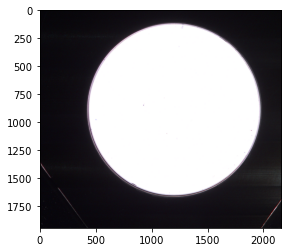

In [6]:
import matplotlib.pyplot as plt

plt.imshow(cv2.imread(clean_images[6]))

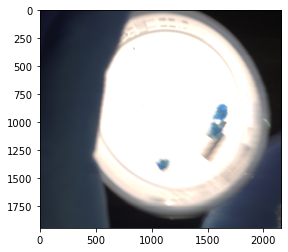

In [10]:
plt.imshow(cv2.imread(noisy_images[2]))